In [1]:
# import section ------------------------------------------------------------------------------------------------------------- #
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


# read in honeyproduction.csv an print first 5 rows -------------------------------------------------------------------------- #
all_data_df = pd.read_csv("./honeyproduction.csv")

print(all_data_df.head(5))

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [2]:
# checking data-types and correcting to desired types  ----------------------------------------------------------------------- #
all_data_df["state"] = all_data_df["state"].astype("string")
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    string 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), string(1)
memory usage: 39.2 KB


In [3]:
# preparing the data --------------------------------------------------------------------------------------------------------- #
agg_mean = all_data_df.groupby("year").mean()
agg_mean.reset_index(inplace=True)
all_data_df = agg_mean.rename(columns = {"index" : "year"})

Y = all_data_df["totalprod"]
X = all_data_df["year"]

Formal Assumptions of Simple Linear Regression Analysis:
 1. Linearity: Relation is linear, so that errors have expected values of 0.
 2. Homoscedasticity: Errors all have the same Variance.
 3. Independence: Errors are Independent of each other.
 4. Normality: Errors are all normally distributed.
 
Because of the structure of the statsmodels library, we're going to check the assumptions after calculating the model.

C:\Users\Maximilian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='totalprod'>

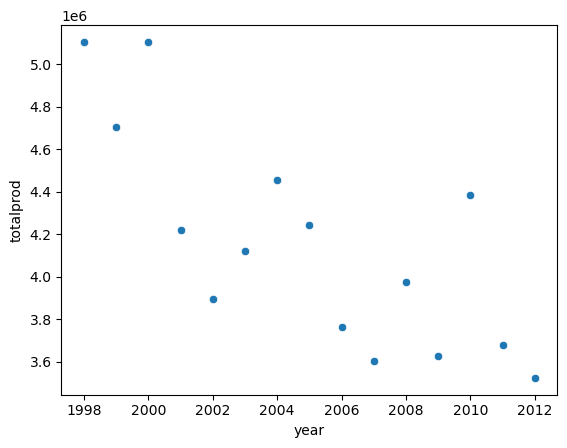

In [4]:
# plotting the data in a scatterplot with LOWESS (locally weighted scatterplot smoothing) ------------------------------------ #
sns.scatterplot(X, Y)

In [5]:
# adding a columns for the intercept (statsmodels specific) ------------------------------------------------------------------ #
X = sm.add_constant(X)

regr = sm.OLS(Y, X, missing="drop")
regr_result = regr.fit()
regr_result.summary()

C:\Users\Maximilian\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              totalprod   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     18.29
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000901
Time:                        15:58:35   Log-Likelihood:                -211.50
No. Observations:                  15   AIC:                             427.0
Df Residuals:                      13   BIC:                             428.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.812e+08   4.14e+07      4.377      0.001    9.18e+07    2.71e+08
year        -8.83e+04   2.06e+04     -4.277      0.001   -1.33e+05   -4.37e+04
==============================================================================
Omnibus:                        0.574   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.541
Skew:                           0.377   Prob(JB):                        0.763
Kurtosis:                       2.453   Cond. No.                     9.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the residuals to check the assumptions

In [6]:
# Histogramm of the Distribution of the Residuals ---------------------------------------------------------------------------- #
mean, std = stats.norm.fit(regr_result.resid)

print("Mean:")
print(mean)
print("Standard Deviation:")
print(std)

Mean:
-4.156803091367086e-08
Standard Deviation:
321631.1217208197


<Figure size 640x480 with 0 Axes>

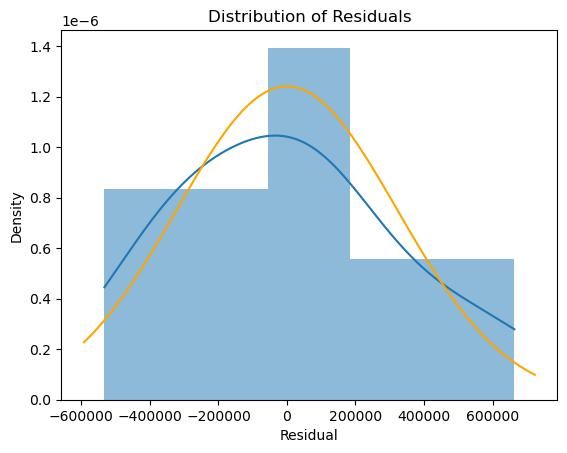

In [7]:
plt.clf()
fig, ax = plt.subplots()
sns.histplot(x = regr_result.resid, ax=ax, stat = "density", linewidth = 0, kde = True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# normalcurve, for easy comparrison ------------------------------------------------------------------------------------------ #
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

<AxesSubplot:>

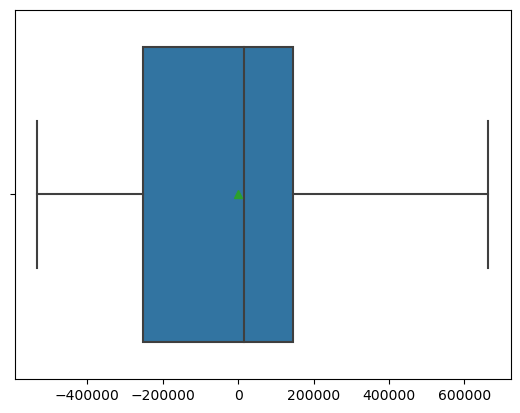

In [8]:
# boxplot of residuals ------------------------------------------------------------------------------------------------------- #
plt.clf()
sns.boxplot(x=regr_result.resid, showmeans=True)

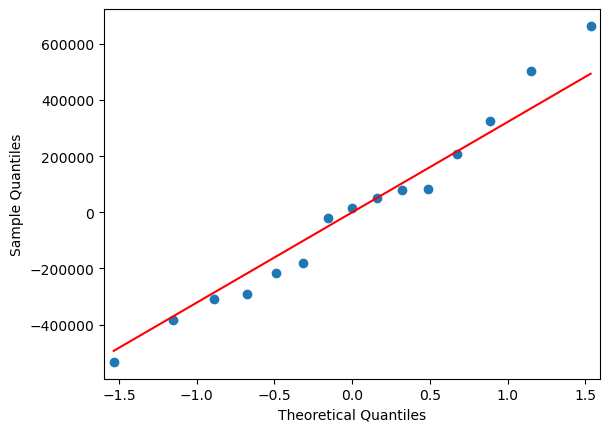

<Figure size 640x480 with 0 Axes>

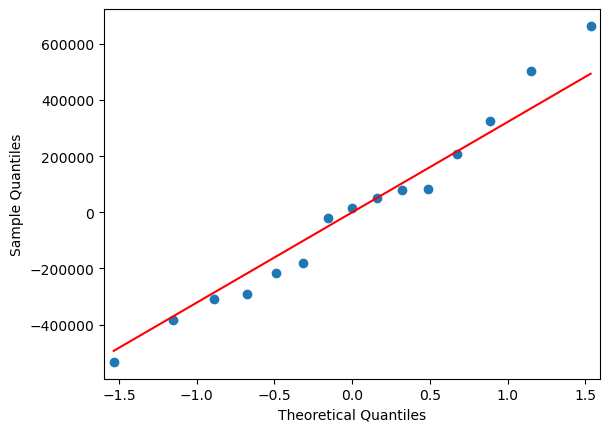

In [9]:
# Quantile - Quantile - Plot ------------------------------------------------------------------------------------------------- #
plt.clf()
sm.qqplot(regr_result.resid, line="s")

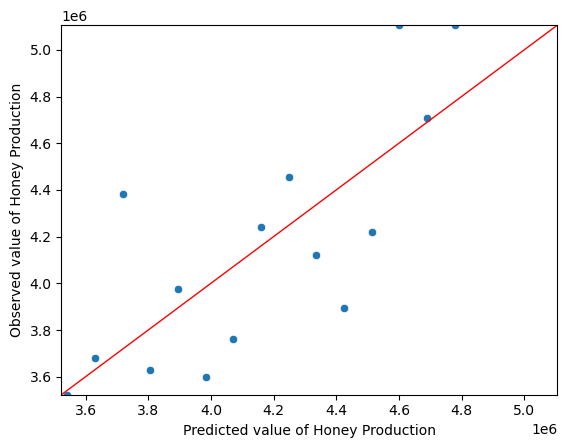

In [10]:
# Fit Plot ------------------------------------------------------------------------------------------------------------------- #
plt.clf()

y_max = Y.max()
y_min = Y.min()

ax = sns.scatterplot(x=regr_result.fittedvalues, y=Y)
ax.set(ylim=(y_min, y_max))
ax.set(xlim=(y_min, y_max))
ax.set_xlabel("Predicted value of Honey Production")
ax.set_ylabel("Observed value of Honey Production")

X_ref = Y_ref = np.linspace(y_min, y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()